# Analysis of Top 200 Movies at Worldwide Box Office from 2000 to 2017

__ __

All analysises are based on the top 200 movies at worldwide box office from 2000 to 2017.
Several short phrases have direct meanings below:

Phrase                                 |Meaning
---------------------------------------|------------------------------------------------------------------------------------
     the domestic                      |              America
     top 200 movies                    |             top 200 movies at worldwide box office
    domestic box office                | domestic box office of these 200 movies which have highest worldwide box office
    overseas box office                | overseas box office of these 200 movies which have highest worldwide box office
top 200 movies at domestic box office  | the reordering of the top 200 movies based on the domestic box office 
top 200 movies at overseas box office  | the reordering of the top 200 movies based on the overseas box office 


### Steps:

* step 0 web scraping and data cleaning
 * acquire the data from the box office Mojo 
 * after data cleaning, save it into boxoffice.csv file
 * you can this process in $WEB SCRAPING OF Box Office .ipynb$
 
 
* step 1 statistical analysis of top 200 movies at worldwide box office from 2000 to 2017
 * turn the box office into real dollars instead of nominal dollars.
 * analysis of whether worldwide box office changed over time? Domestic? Overseas?
 * explore the distribution of worldwide box office over time. Is it similar to that of the domestic and the overseas?
 * which movies are included in the top 10 of the worldwide, the domestic and the overseas box office? Is there a large difference?
 * could the title of the movie affect the box office? is there a pattern of naming for the movies with highest box office? or the movies with most succesful box office share same words?
 
 
* step 2 specific analysis of 2017 top 200 movies at worldwide box office
 * what are the most frequent words in 2017 yearly top 200 movies' names? 
 * is there a pattern of the protion of domestic box office in the top 100 movies? 
 * has the Big Six still ruled the movie market?
 * find domestic movies have higher box office in China instead of in the USA.


* step 3 detailed analysis of movies that have different domestic and Chinese box office 
 * it is based on 7 movies among 2017 top 200 movies we get from step2.
 * you can this process in $Analysis of 7 movies with different domestic and Chinese box office.ipynb$.

__ __

## step 0 web scraping and data cleaning

You can this process in WEBSCRAPINGOFBoxOffice.ipynb file. The final result of this process is the boxoffice.csv file

In [1322]:
import pandas as pd
import numpy as np
import plotnine as gg
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [1323]:
df=pd.read_csv('boxoffice.csv')

In [1324]:
df.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link
0,2000,1,Mission: Impossible II,Par.,546.4,215.4,331.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
1,2000,2,Gladiator,DW,457.6,187.7,269.9,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
2,2000,3,Cast Away,Fox,429.6,233.6,196.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
3,2000,4,What Women Want,Par.,374.1,182.8,191.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
4,2000,5,Dinosaur,BV,349.8,137.7,212.1,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...


__ __

## step 1 statistical analysis of top 200 movies at worldwide box office from 2000 to 2017

__step 1.0 First turn the box office into real dollars instead of nominal dollars. We acquire the CPI-All Urban Consumers (U.S. Recreation) data from U.S. Labour of Statistics. __

First turn the box office into real dollars instead of nominal dollars. We acquire the CPI-All Urban Consumers (U.S. Recreation) data from U.S. Labour of Statistics.

CPI-All Urban Consumers (Current Series and Not Seasonally Adjusted)

Catlogue      | Discription
--------------| --------------------------------------------------------------------------------
Series Id     | CUUR0000SAR
Series Title  | Recreation in U.S. city average, all urban consumers, not seasonally adjusted
Area          | U.S. city average
Item          | Recreation
Base Period   | DECEMBER 1997=100


In [1325]:
#download CPI-All Urban Consumers (Current Series) 
#U.S. Recreation, 1982-84=100 - CUUR0000SAR
#from https://data.bls.gov/pdq/SurveyOutputServlet
Year=list(range(2000,2018))
CPI=[103.3,104.9,106.2,107.5,108.6,109.4,110.9,111.443,113.254,114.272,113.313,113.357,114.703,115.266,115.543,115.941,116.984,118.504]

In [1326]:
dict={"Year":Year,
      "CPI":CPI}
cpirate=pd.DataFrame(dict)

In [1327]:
df1=pd.merge(df,cpirate)

Nominal & Real Dollars
Consumer price index data can be used to convert nominal dollars to real dollars. The formula is

$$ (real \$) = (nominal $) ·CPIb/CPIy $$
where b is the base year and y is the nominal dollars year. 
In this case, we take 2017 as the base year.
Based on: http://itech.fgcu.edu/faculty/bhobbs/Nominal%20Real%20Price%20Index.htm

In [1328]:
CPI2017=cpirate[cpirate['Year']==2017]['CPI']
print(CPI2017)

17    118.504
Name: CPI, dtype: float64


In [1329]:
df1['Worldwide']=df1['Worldwide']*118.504/df1['CPI']
df1['Domestic']=df1['Domestic']*118.504/df1['CPI']
df1['Overseas']=df1['Overseas']*118.504/df1['CPI']

In [1330]:
df1=df1.round({'Worldwide': 1, 'Domestic': 1,'Overseas':1})

Now the box office is turned into real dollars based on 2017.

In [1331]:
df1.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link,CPI
0,2000,1,Mission: Impossible II,Par.,626.8,247.1,379.7,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3
1,2000,2,Gladiator,DW,525.0,215.3,309.6,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3
2,2000,3,Cast Away,Fox,492.8,268.0,224.8,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3
3,2000,4,What Women Want,Par.,429.2,209.7,219.5,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3
4,2000,5,Dinosaur,BV,401.3,158.0,243.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3


__ __

__step 1.1 Have worldwide box office changed over time? Domestic? Overseas? __

In [1332]:
groupsum=df1.groupby(['Year']).agg({'Year':np.mean,'Worldwide': np.sum,'Domestic': np.sum,'Overseas': np.sum})
box_office=groupsum['Worldwide'].append(groupsum['Domestic'])
box_office=box_office.append(groupsum['Overseas'])
cat=['Worldwide']*18+['Domestic']*18+['Overseas']*18
year=list(range(2000,2018))*3

groupsum1=pd.DataFrame({'BoxOffice':box_office,'Catlogue':cat,'Year':year})
groupsum1.head()

,BoxOffice,Catlogue,Year
Year,,,
2000,15939.4,Worldwide,2000
2001,17436.9,Worldwide,2001
2002,19482.5,Worldwide,2002
2003,19981.0,Worldwide,2003
2004,20677.6,Worldwide,2004


Though we considerate about the CPI rate, turn the box office data into real dolloars, the worldwide, domestic and overseas boxoffice 

					Change of Box Office Over Years


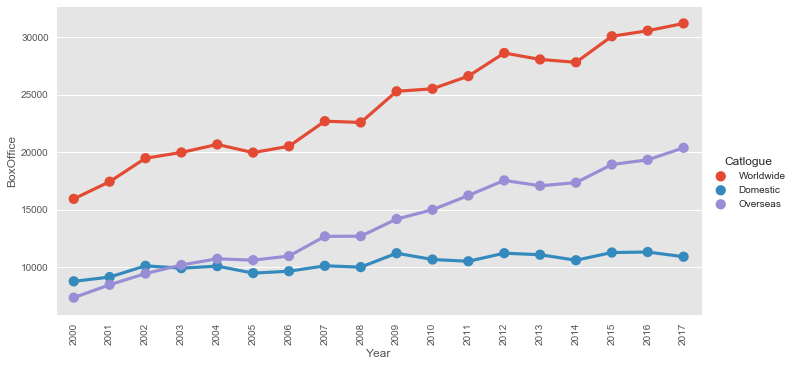

In [1333]:
print('\t\t\t\t\tChange of Box Office Over Years')
g=sns.factorplot(data=groupsum1, x="Year", y='BoxOffice', style="ticks",hue='Catlogue',size=5, aspect=2)
g.set_xticklabels(rotation = 90)

We could see that compared to the domestic yearly box office, worldwide and overseas box office have the overall trend of increasing. The curve of the domestic yearly box office is more flat and it seems that the domestic film market is close to saturation. While in other countries, like China, film industries have developed rapidly, indicated by the large amount of audiences and screens in the cinema. 

There is an intersection in 2003 between the domestic and overseas yearly box office. After that intersection, the overseas box office have overtaken the domestic box office. And we could also find from 2000 to 2003, domestic box office has more influence on the worldwide box office as the curve of the worldwide box office is more similar with that of the domestic box office, but after 2003, the worldwide box office is more similar with that of the overseas box office.

We could also find an interesting phenomenon that the overall decrease of the domestic box office is in connection with American political ans economical situation. For example, from 2002 to 2005, there was a serious financial crisis in America, and to some extent it caused the decrease in the domestic boxoffice. And the 9/11 attacks may also explain the slight increase of the domestic box office from 2000 to 2011.

__ __

__step 1.2 Explore the distribution of worldwide box office over time? Is it similar to that of the domestic and the overseas? __

In [1334]:
def df2(n):
    '''
    Show the dataframe of Yearly Top n Box Office
    Input:n, integer number
    Output:dataframe of Yearly Top n Box Office(colnames=[['Year','Boxoffice','Category']])
    '''
    year=[]
    box_office=[]

    for i in range(2000,2018):
        year1=list([i]*3*n)
        year=year+year1
    
        data1=df1[df1['Year']==i]['Worldwide'][0:n].append(df1[df1['Year']==i]['Domestic'][0:n])
        data1=data1.append(df1[df1['Year']==i]['Overseas'][0:n])
        box_office+=list(data1)
    
    cat=list((['Worldwide']*n+['Domestic']*n+['Overseas']*n)*18)
    df2=pd.DataFrame({'Year':year,'Boxoffice':box_office,'Category':cat})
    df2=df2[['Year','Boxoffice','Category']]
    return df2

In [1335]:
def boxplot(n):
    '''
    Show the barplot of Yearly Top n Box Office
    Input:n, integer number
    Output:barplot of Yearly Top n Box Office
    '''
    dataframe=df2(n)
    ax = sns.boxplot(x="Year",y="Boxoffice", hue="Category",
                 data=dataframe, palette="Set3")
    ax.set(title = "Yearly Top "+str(n)+" Box Office", xlabel = "Year", ylabel = "Box Office")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    return ax

Look for differences among the spreads of the worldwide, domestic and overseas boxoffice. Certainly, worldwide box offcie has 	most variable weights and largest medians. The median weights of these 3 groups of are similar. But median weights between the	 overseas and domestic box office are more similar, they are almost the same from 2009 to 2015. And In 2016 and 2107, the median of the overseas box office overtook that of the domestic.


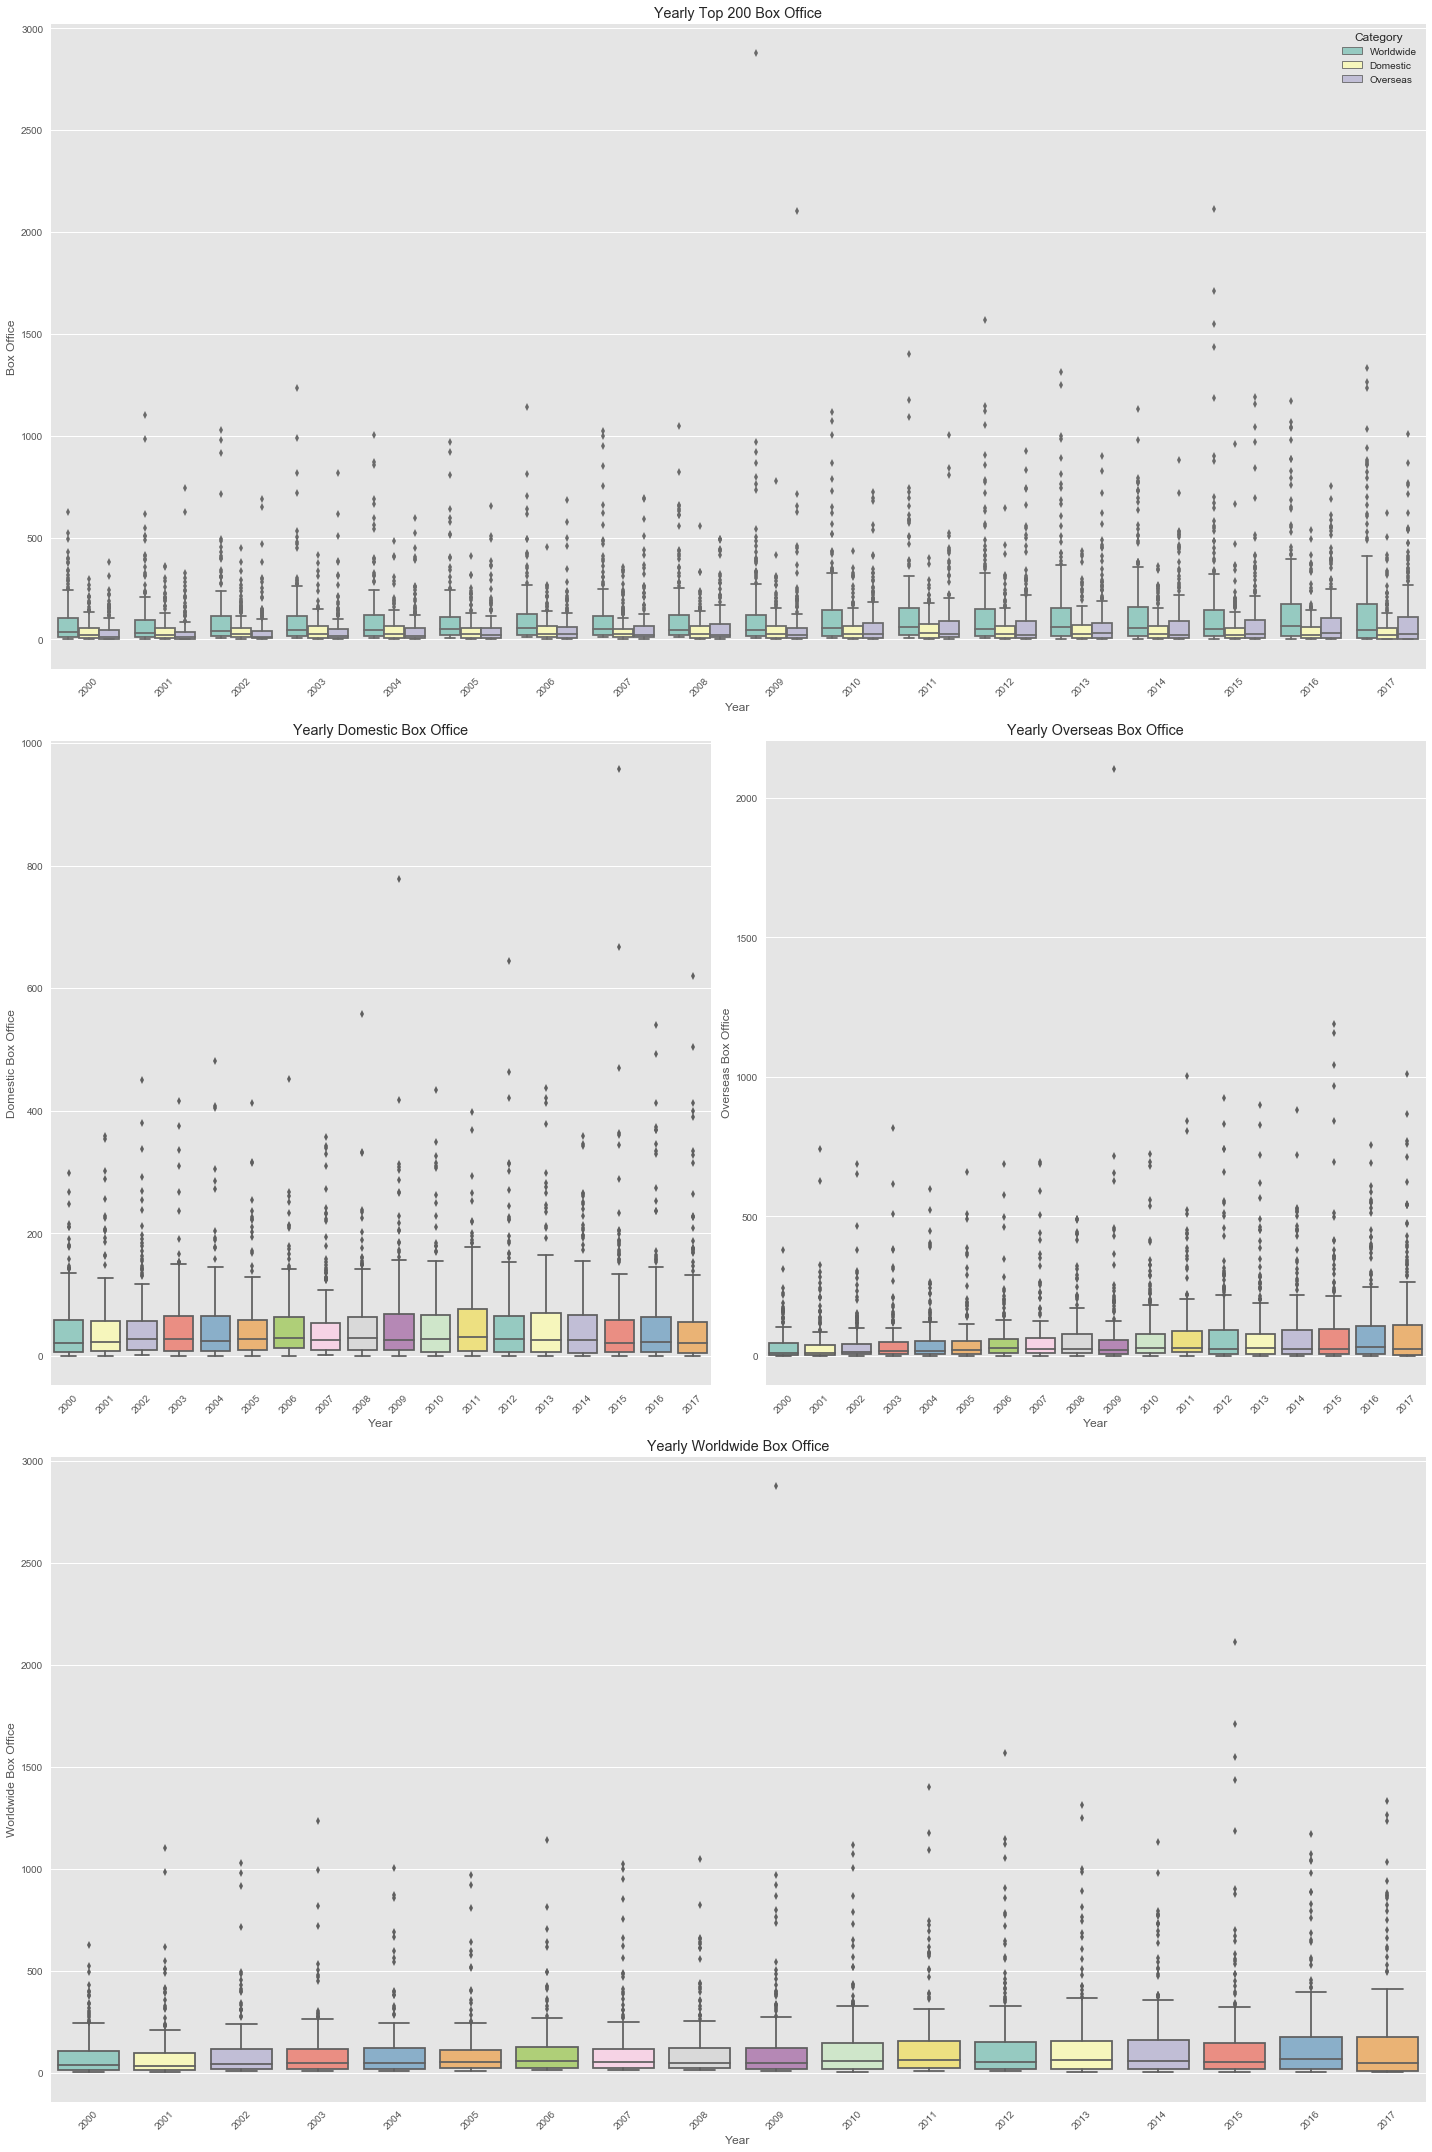

In [1336]:
plt.rcParams['figure.figsize'] = (20,30)

print('Look for differences among the spreads of the worldwide, domestic and overseas boxoffice. Certainly, worldwide box offcie has \tmost variable weights and largest medians. The median weights of these 3 groups of are similar. But median weights between the\t overseas and domestic box office are more similar, they are almost the same from 2009 to 2015. And In 2016 and 2107, the median of the overseas box office overtook that of the domestic.')

plt.subplot(311) 
ax1=boxplot(200)

plt.subplot(323) 
ax = sns.boxplot(x = "Year", y = "Domestic", data =df1, palette="Set3")
ax.set(title = "Yearly Domestic Box Office", xlabel = "Year", ylabel = "Domestic Box Office")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.subplot(324) 
ax = sns.boxplot(x = "Year", y = "Overseas", data =df1, palette="Set3")
ax.set(title = "Yearly Overseas Box Office", xlabel = "Year", ylabel = "Overseas Box Office")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.subplot(313) 
ax = sns.boxplot(x = "Year", y = "Worldwide", data =df1, palette="Set3")
ax.set(title = "Yearly Worldwide Box Office", xlabel = "Year", ylabel = "Worldwide Box Office")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.tight_layout()

For the boxplot of the domestic yearly box office, there are slight differences between upper and lower quartiles. However, for the upper quartiles of the each year's box office, they have been fluctuating around the upper quartile of 2001. We could also notice the outlier with the highest domestic boxoffice, it was the movie,__'Star Wars: The Force Awakens'__,showed in 2015. It earned the second highest box office from 2000 to 2017. 

However, when looking at the boxplot of the overseas yearly box office, we could see the outlier with the highest worldwide boxoffice changes. The champion is the movie, __'Avatar'__, showed in 2009. 'Avatar' earned the highest box office from 2000 to 2017. It is also the outlier with the highest worldwide and overseas boxoffice. We also notice that the upper quartile has an overall trend of increasing.

But for the worldwide yearly box office, the upper quartile has been fluctuating, which is more like the trend of the domestic's. 

Then we could have a more detailed comparision among the worldwide, domestic and overseas boxoffice.

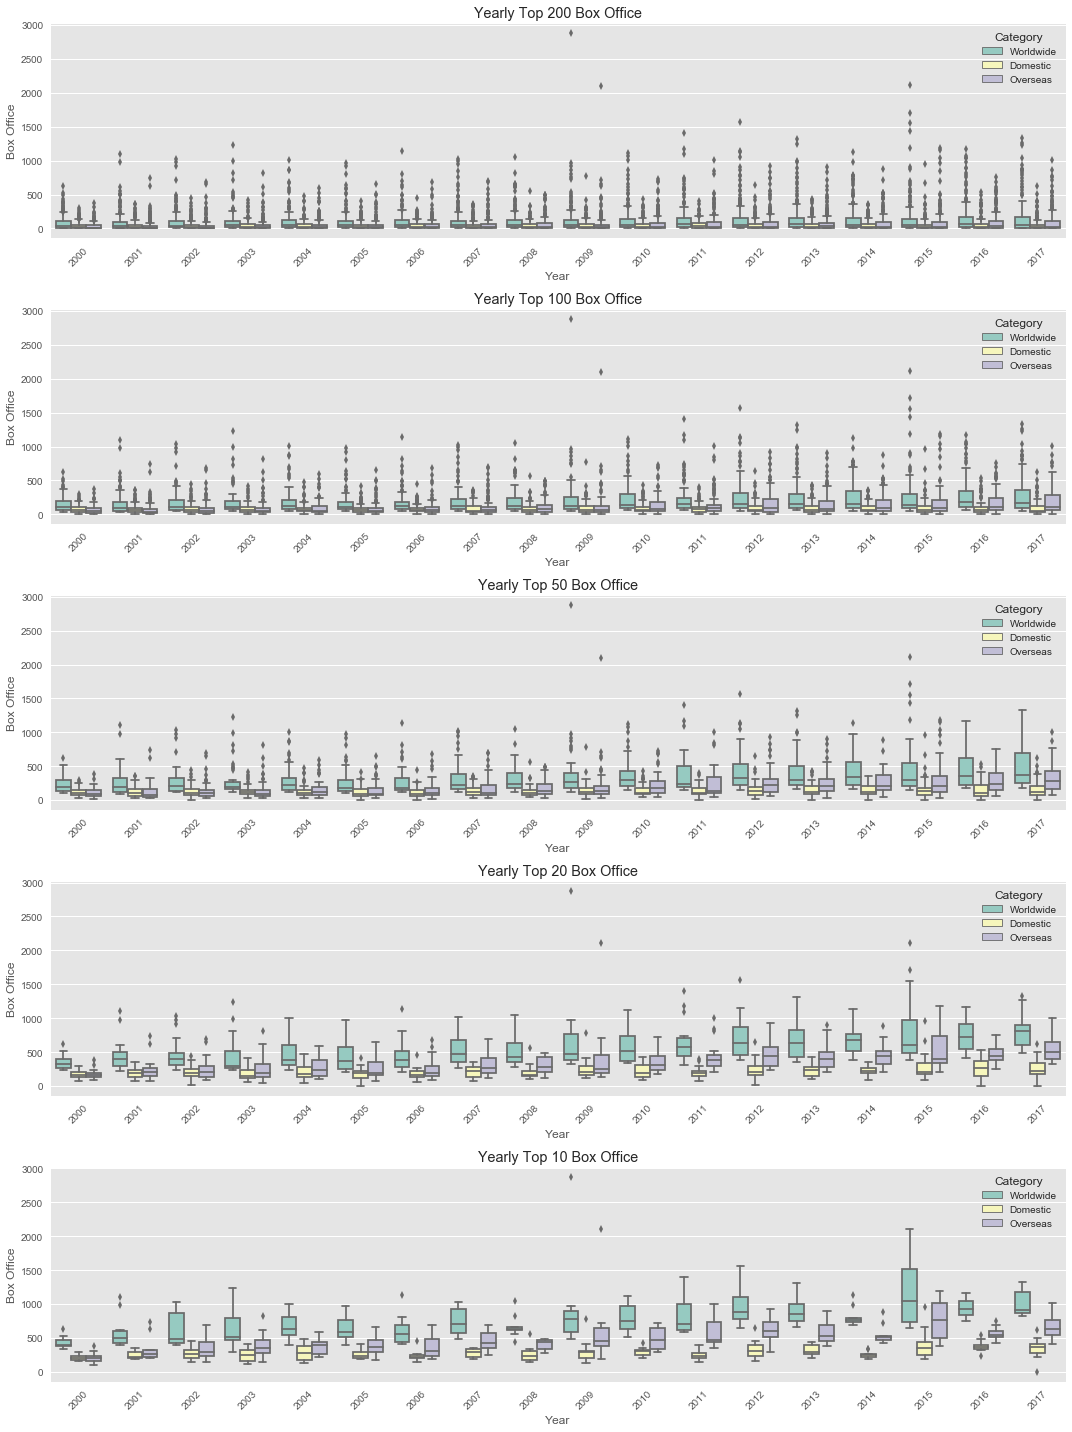

In [1337]:
plt.rcParams['figure.figsize'] = (15,20)
plt.subplot(511) 
ax1=boxplot(200)

plt.subplot(512)
ax2=boxplot(100)

plt.subplot(513)
ax3=boxplot(50)

plt.subplot(514)
ax4=boxplot(20)

plt.subplot(515)
ax5=boxplot(10)
plt.tight_layout()

We could compare the yearly top 200, 100, 50, 20 and 10 movies' box office through the boxplot. We could know the differences among the spreads based on different years or different categories. For example, we could compare the differences between upper and lower quartiles of 2015 yearly box office. It is noticed that when considerating fewer top movies, the differences between upper and lower quartiles of worldwide, domestic and overseas box office get larger. However, it is not correct when considerate thoes in 2014, just one year before 2015, things change. It is noticed that when considerate the top 10 and 20 movies, the differences between upper and lower quartiles of top 10 worldwide, domestic and overseas box office are smaller then thouse of top 20 movies.

__ __

__step 1.3 Which movies are included in the top 10 movies of the worldwide, domestic and overseas box office? Is there a large difference? __

In [1338]:
Top10_worldwide=df1.sort_values("Worldwide",ascending=False).head(10)
Top10_worldwide

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link,CPI
1800,2009,1,Avatar,Fox,2880.1,777.6,2102.6,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,114.272
3000,2015,1,Star Wars: The Force Awakens,BV,2113.9,957.4,1156.6,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
3001,2015,2,Jurassic World,Uni.,1708.7,666.7,1041.9,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
2400,2012,1,Marvel's The Avengers,BV,1569.1,644.1,925.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,114.703
3002,2015,3,Furious 7,Uni.,1549.5,360.8,1188.7,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
3003,2015,4,Avengers: Age of Ultron,BV,1436.5,469.1,967.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
2200,2011,1,Harry Potter and the Deathly Hallows Part 2,WB,1402.4,398.3,1004.1,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,113.357
3400,2017,1,Star Wars: The Last Jedi,BV,1331.9,619.7,712.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,118.504
2600,2013,1,Frozen,BV,1312.4,412.0,900.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.266
3401,2017,2,Beauty and the Beast (2017),BV,1263.5,504.0,759.5,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,118.504


In [1339]:
Top10_domestic=df1.sort_values("Domestic",ascending=False).head(10)
Top10_domestic

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link,CPI
3000,2015,1,Star Wars: The Force Awakens,BV,2113.9,957.4,1156.6,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
1800,2009,1,Avatar,Fox,2880.1,777.6,2102.6,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,114.272
3001,2015,2,Jurassic World,Uni.,1708.7,666.7,1041.9,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
2400,2012,1,Marvel's The Avengers,BV,1569.1,644.1,925.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,114.703
3400,2017,1,Star Wars: The Last Jedi,BV,1331.9,619.7,712.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,118.504
1600,2008,1,The Dark Knight,WB,1049.5,558.0,491.5,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,113.254
3201,2016,2,Rogue One: A Star Wars Story,BV,1069.8,539.1,530.7,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,116.984
3401,2017,2,Beauty and the Beast (2017),BV,1263.5,504.0,759.5,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,118.504
3202,2016,3,Finding Dory,BV,1042.0,492.6,549.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,116.984
800,2004,1,Shrek 2,DW,1003.7,481.4,522.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,108.600


In [1340]:
Top10_overseas=df1.sort_values("Overseas",ascending=False).head(10)
Top10_overseas

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link,CPI
1800,2009,1,Avatar,Fox,2880.1,777.6,2102.6,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,114.272
3002,2015,3,Furious 7,Uni.,1549.5,360.8,1188.7,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
3000,2015,1,Star Wars: The Force Awakens,BV,2113.9,957.4,1156.6,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
3001,2015,2,Jurassic World,Uni.,1708.7,666.7,1041.9,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
3402,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,118.504
2200,2011,1,Harry Potter and the Deathly Hallows Part 2,WB,1402.4,398.3,1004.1,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,113.357
3003,2015,4,Avengers: Age of Ultron,BV,1436.5,469.1,967.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.941
2400,2012,1,Marvel's The Avengers,BV,1569.1,644.1,925.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,114.703
2600,2013,1,Frozen,BV,1312.4,412.0,900.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.266
2800,2014,1,Transformers: Age of Extinction,Par.,1132.4,251.7,880.6,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,115.543


C:\Users\qxzhao\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



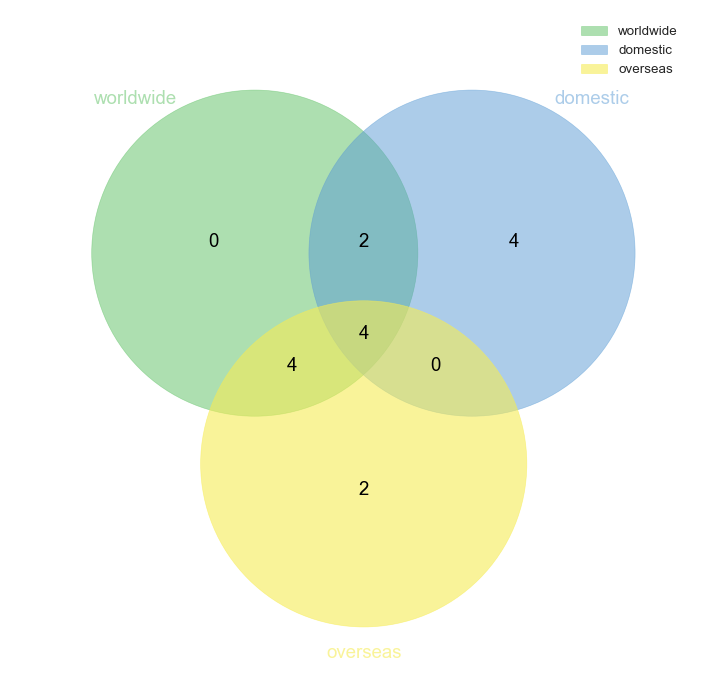

In [1341]:
%matplotlib inline
import venn

set1 = set(Top10_worldwide['Title'])
set2 = set(Top10_domestic['Title'])
set3 = set(Top10_overseas['Title'])
labels = venn.get_labels([set1, set2, set3])
fig, ax = venn.venn3(labels, names=['worldwide', 'domestic','overseas'])
fig.show()

We could see that there are 8 overlapped movies between the worldwide and the overseas top 10 movies, 4 between the domestic and overseas, 6 between the domestic and worldwide. It is noticed that the difference between the overseas and the domestc.

Whether things change when considerate more top movies. Now, we considerate about 20 top movies.

In [1342]:
Top20_worldwide=df1.sort_values("Worldwide",ascending=False).head(20)
Top20_domestic=df1.sort_values("Domestic",ascending=False).head(20)
Top20_overseas=df1.sort_values("Overseas",ascending=False).head(20)

C:\Users\qxzhao\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



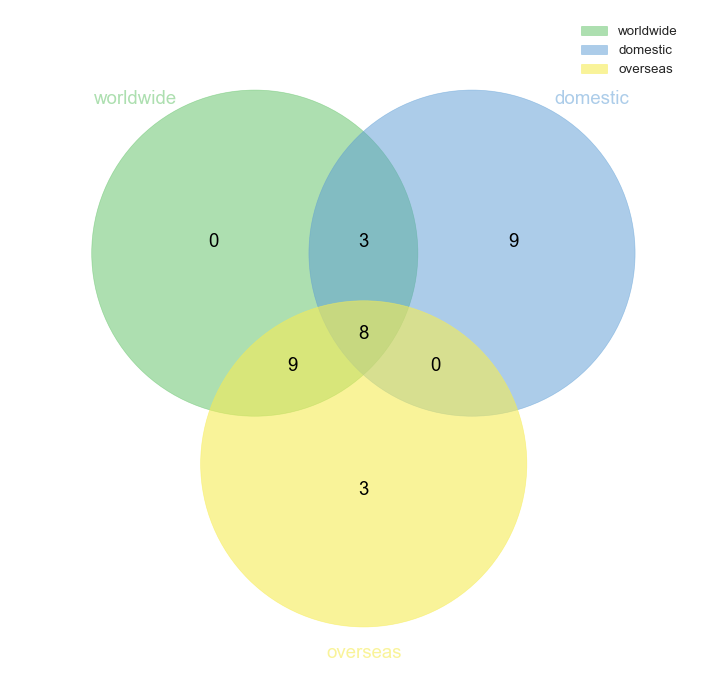

In [1343]:
%matplotlib inline
import venn

set1 = set(Top20_worldwide['Title'])
set2 = set(Top20_domestic['Title'])
set3 = set(Top20_overseas['Title'])
labels = venn.get_labels([set1, set2, set3])
fig, ax = venn.venn3(labels, names=['worldwide', 'domestic','overseas'])
fig.show()

 We still find there is a larger difference between the overseas and the domestc rankings.

Then, we considerate about 30 top movies

C:\Users\qxzhao\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



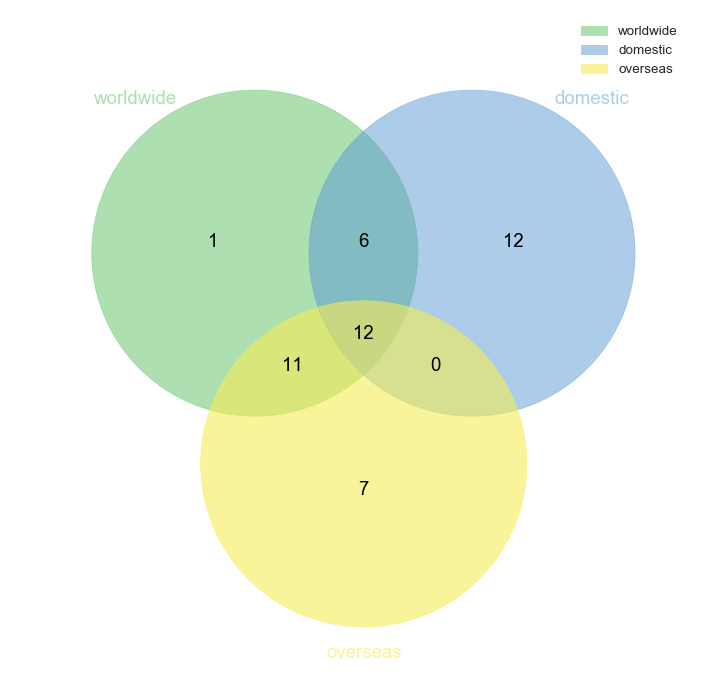

In [1344]:
Top30_worldwide=df1.sort_values("Worldwide",ascending=False).head(30)
Top30_domestic=df1.sort_values("Domestic",ascending=False).head(30)
Top30_overseas=df1.sort_values("Overseas",ascending=False).head(30)

%matplotlib inline
import venn

set1 = set(Top30_worldwide['Title'])
set2 = set(Top30_domestic['Title'])
set3 = set(Top30_overseas['Title'])
labels = venn.get_labels([set1, set2, set3])
fig, ax = venn.venn3(labels, names=['worldwide', 'domestic','overseas'])
fig.show()

Things don't change. It seems like that for the top 10,20 and 30 movies, there are fewer overlaps between the domestic and overseas.We find another pattern that there are more overlaps between the worldwide and overseas. These 2 patterns are also proved in the top 40 movies.

We think these differences indicate the unique culture in America and overseas coutries. It does exist huge difference in the domestic and the overseas. For example, China, the largest overseas movie market, Chinese audience have different taste of movie selection. It could also be testified in the Part 4 analysis.

C:\Users\qxzhao\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



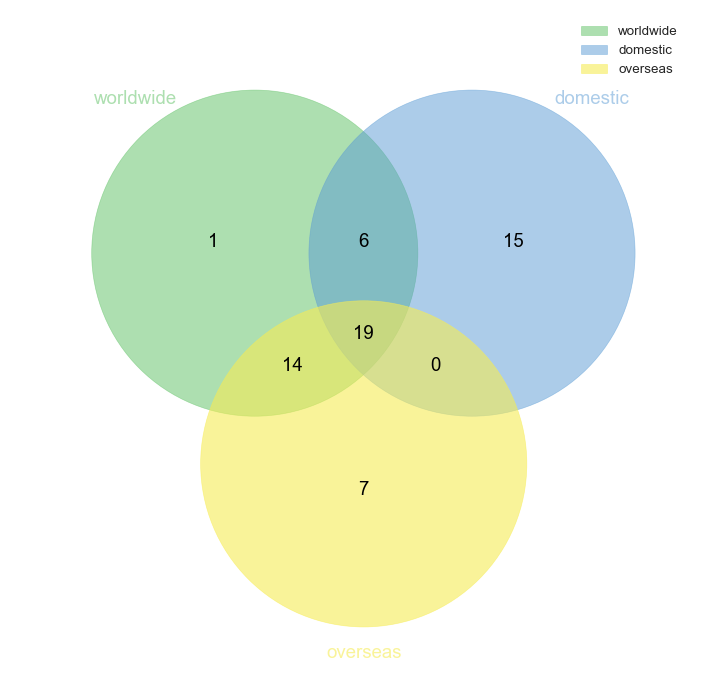

In [1345]:
Top40_worldwide=df1.sort_values("Worldwide",ascending=False).head(40)
Top40_domestic=df1.sort_values("Domestic",ascending=False).head(40)
Top40_overseas=df1.sort_values("Overseas",ascending=False).head(40)

%matplotlib inline
import venn

set1 = set(Top40_worldwide['Title'])
set2 = set(Top40_domestic['Title'])
set3 = set(Top40_overseas['Title'])
labels = venn.get_labels([set1, set2, set3])
fig, ax = venn.venn3(labels, names=['worldwide', 'domestic','overseas'])
fig.show()

__step 1.4 Could the title of the movie affect the box office? Is there a pattern of naming for the movies with highest box office? Or the movies with most succesful box office share same words?__

In this part we only considerate about the worldwide yearly box office.

In [1346]:
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud


In [1347]:
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

We do not considerate stopwords in films' names.

In [1348]:
stopwords =stopwords.words("english")+['IMAX','movie','3D','3d','imax']+list(range(2000,2018))

In [1349]:
def newtext(text):
    '''Return a new text after the stopwords and lemmatizing'''
    blob = TextBlob(text)
    new_text = " ".join(w for w in blob.words if w.lower() not in stopwords)
    blob = TextBlob(new_text)
    tags = [wordnet_pos(x[1]) for x in blob.pos_tags]
    new_text = " ".join(x.lemmatize(t) for x, t in zip(blob.words, tags))
    blob = TextBlob(new_text)
    return new_text

In [1350]:
def ReturnCount(text):
    '''Return a word counts dictionary'''
    new=newtext(text)
    blob = TextBlob(new)
    return blob.word_counts  

In [1351]:
def countdata(text):
    '''
    Sort the counts of each distinct word
    input:text(string)
    output:datafrane of the word counts dictionary
    '''
    dic=ReturnCount(text)
    count=pd.DataFrame(list(dic.items()), columns=['word', 'count'])
    return count

In [1352]:
def countsort(text):
    '''
    sort the countdata
    input:text(string)
    output:dataframe of 10 most frequent words and their counts
    '''
    df1=countdata(text)
    newdf=df1.sort_values(by='count', ascending=False).head(10)
    return newdf

In [1353]:
def barplot(text):
    '''
    input:text(string)
    output:barplot of the most frequent words and counts
    '''
    data=countsort(text)
    new=newtext(text)
    plt.rcParams['figure.figsize'] = (7,5)
    sns.set(font_scale = 1.5)

    sns.set_style("whitegrid")
    fruit_bar = sns.barplot(x = "word", y = "count", data =data)
    for item in fruit_bar.get_xticklabels():
        item.set_rotation(20)
    plt.title('Count of Unique Words in Movie Names')
    fruit_bar.set(ylabel = 'Count', xlabel = 'Word')
    p=plt.show()
    return p

In [1354]:
def wordcloud(text):
    '''
    input:text(string)
    output:wordcloud of the text
    '''
    data=countsort(text)
    new=newtext(text)

    # Generate a word cloud image
    wordcloud = WordCloud().generate(new)

   # lower max_font_size
    wordcloud = WordCloud(max_font_size=50).generate(new)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('wordcloud of movie names')
    plt.rcParams['figure.figsize'] = (15,8)
    p=plt.show()
    return p


The top 10 words in the top 200 films' names are 'the', 'of', 's', 'a', 'and','in', '2','to', 'man','i'. Here 's' is present for ' 's'. At first, it might seem strange, but when you look back on the movies you saw before, for example, for the word 'man', 'Spider Man','Iron Man','Iron Man','X-men','Ant-man','Ip Man'(一代宗师：叶问). And for the word '2' and '3', you know most successful films have their series, it's '2' that after '1' and '3' after '2', for instance, 'Spider Man 2', 'Iron Man 2', 'X-men 2', and 'Ant-man 2' will be on in the following August. 

In [1355]:
name=' '.join([str(i) for i in df1['Title']])
countsort(name)

,word,count
21,s,145
124,2,101
42,man,51
197,love,37
55,3,30
400,last,29
92,day,28
47,house,27
264,night,26
120,life,24


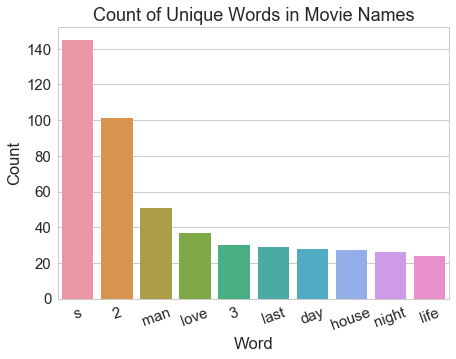

In [1356]:
barplot(name)

And you could also see 'World','Secret','War','Legend','Girl' and 'Dog' are also some most frquent words shown in the top 200 movies from 2000 to 2017.

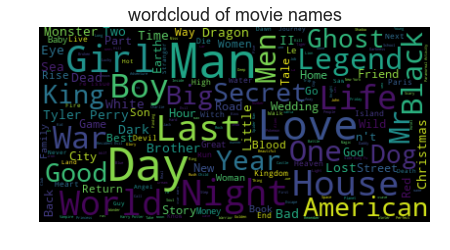

In [1357]:
wordcloud(name)

Here, we could see the effect of sequels of original movies, especially the first and second in sequels. You could also see the biggest winner of film series is __'Harry Potter'__, if we just considerate the period between 2000 and 2017. Each film in Harry Potter series is among the top 50 movies in the year it was on.

And you could also see 'World','King','Day','Monster','Men' and 'War' are also some most frquent words shown in the top 50 movies from 2000 to 2017.

In [1358]:
Top50_name=' '.join([str(i) for i in df1[df1['Category']=='Top1to50']['Title']])
countsort(Top50_name)

,word,count
122,2,50
21,s,42
55,3,19
42,man,11
92,day,10
2,ii,9
204,star,8
96,harry,8
97,potter,8
842,part,8


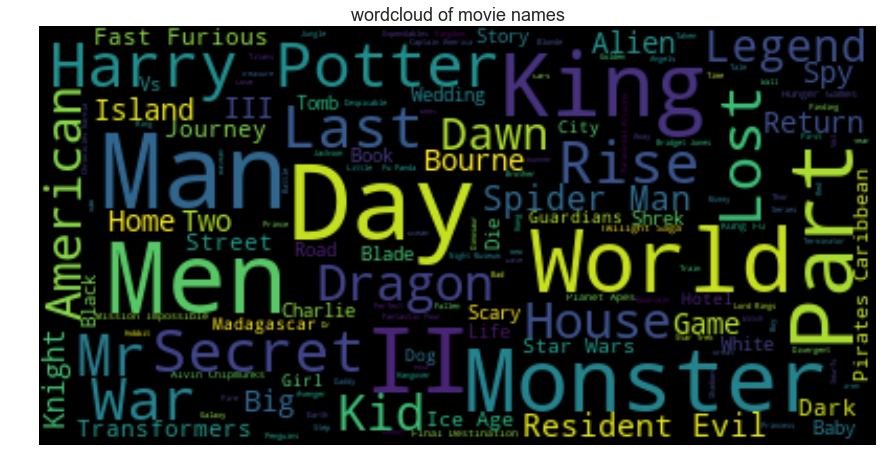

In [1359]:
wordcloud(Top50_name)

In [1360]:
def namelist(year):
    '''
    input: year, integer number
    output: list of unique film names
    '''
    text=' '.join(str(i) for i in df1['Title'][(df1['Year']==year)])
    UniqueList=np.unique(countdata(text)['word'])
    return UniqueList

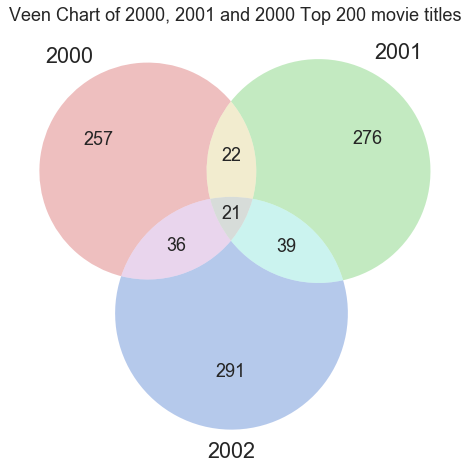

In [1361]:
from matplotlib_venn import venn3
set1 = set(namelist(2000))
set2 = set(namelist(2001))
set3 = set(namelist(2002))
           
venn3([set1, set2,set3], ('2000', '2001','2002'))
plt.rcParams["figure.figsize"] = [7,15]
plt.title('Veen Chart of 2000, 2001 and 2000 Top 200 movie titles')
plt.show()

C:\Users\qxzhao\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



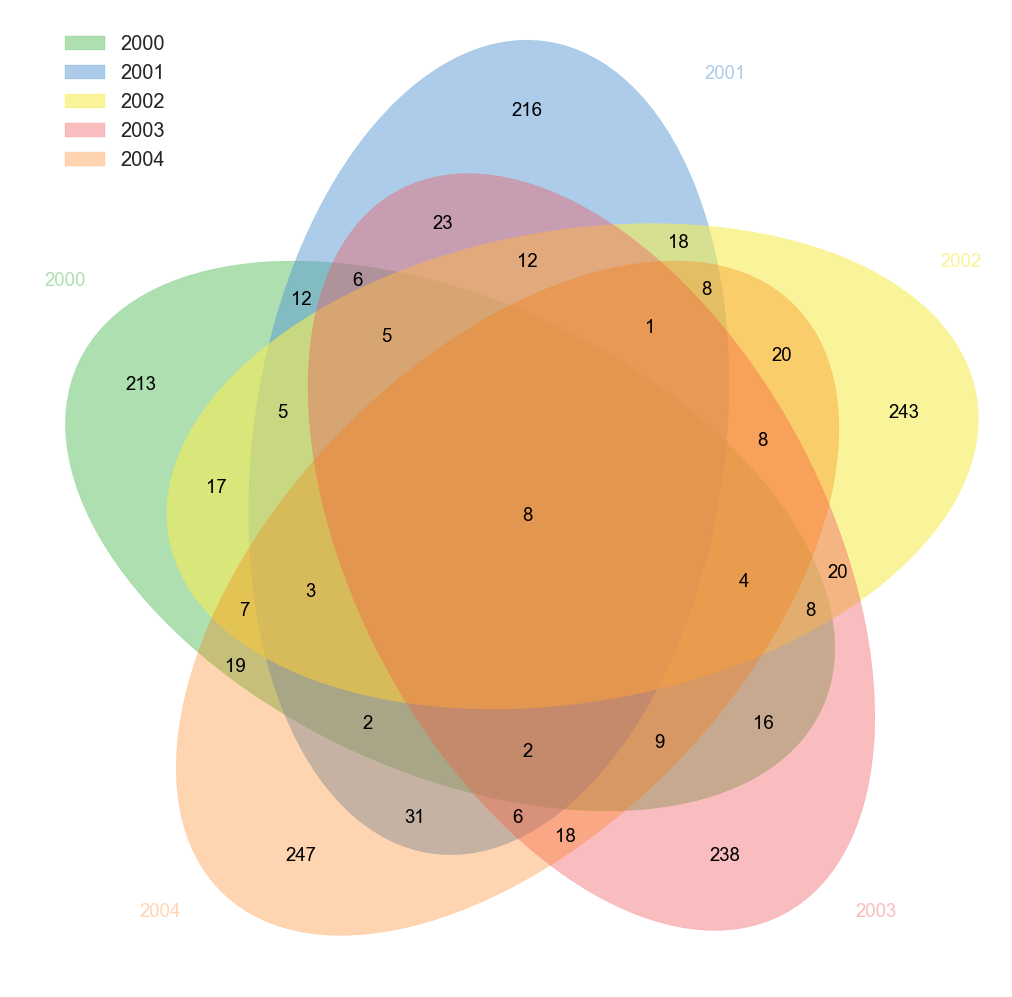

In [1362]:
%matplotlib inline
import venn

labels = venn.get_labels([set(namelist(2000)),set(namelist(2001)), set(namelist(2002)), set(namelist(2003)), set(namelist(2004))])
fig, ax = venn.venn5(labels, names=['2000', '2001', '2002', '2003','2004'])
fig.show()

C:\Users\qxzhao\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



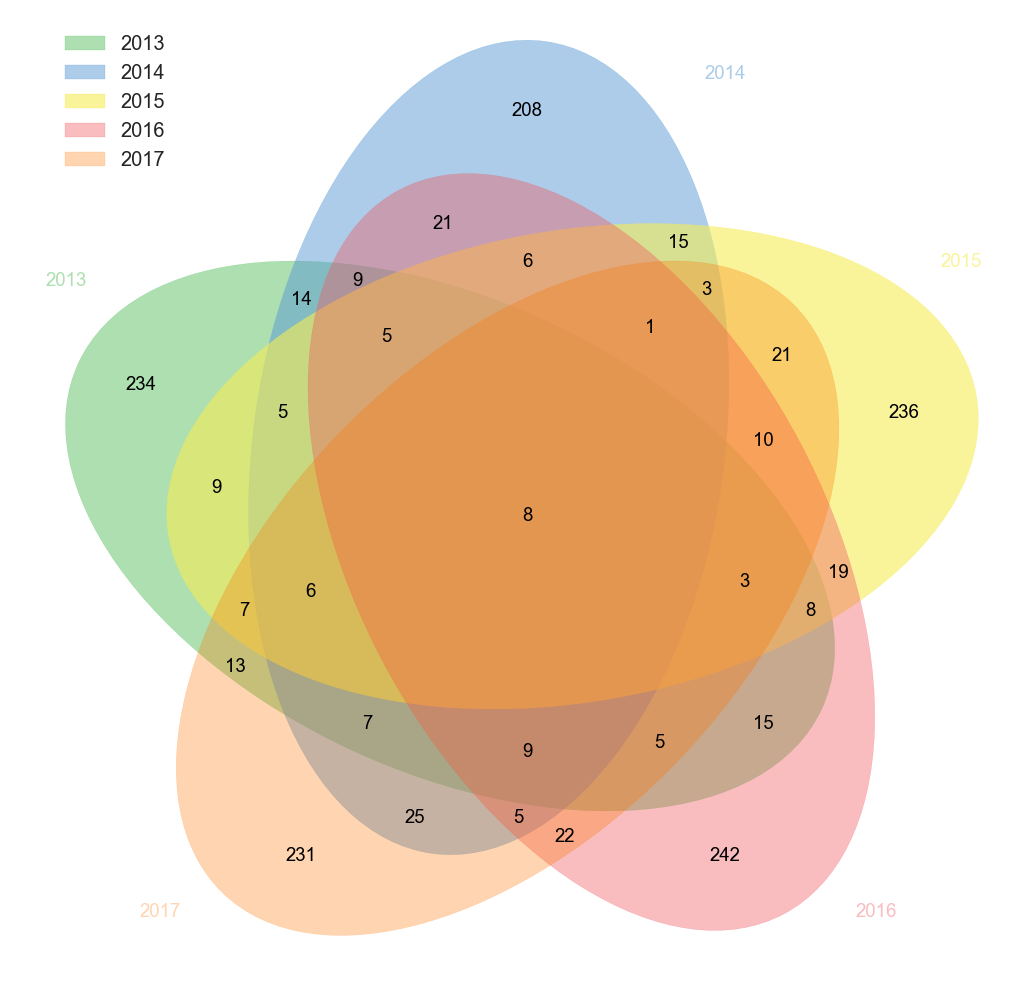

In [1363]:
labels = venn.get_labels([set(namelist(2013)),set(namelist(2014)), set(namelist(2015)), set(namelist(2016)), set(namelist(2017))])
fig, ax = venn.venn5(labels, names=['2013', '2014', '2015', '2016','2017'])
fig.show()

Based on Veen diagram above, the overlapped words are very few, so we could assume there is no such pattern of naming for the movies with highest box office.

# step 2 analysis of 2017 yearly box office 

__step 2.1 What are the most frequent words in 2017 yearly top 200 movies' names?__

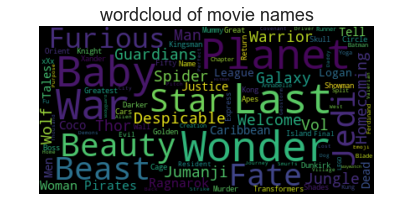

In [1364]:
Top50_2017_name=' '.join(str(i) for i in df1['Title'][(df1['Category']=='Top1to50')&(df1['Year']==2017)])
wordcloud(Top50_2017_name)

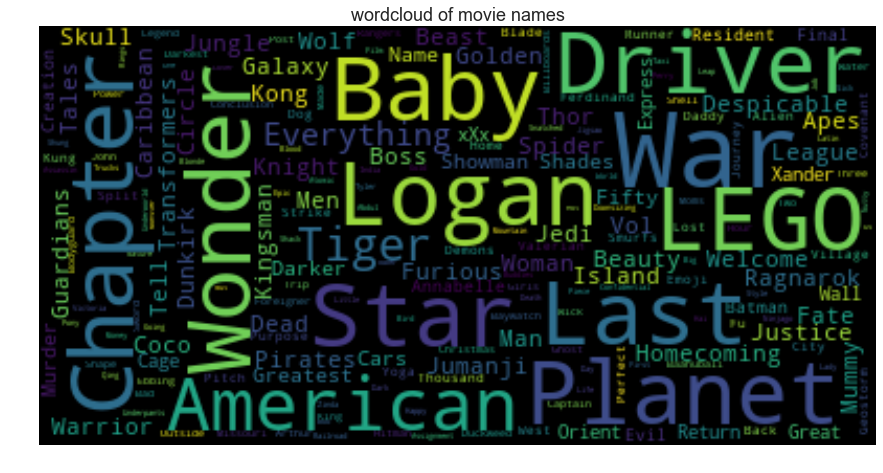

In [1365]:
Top200_2017_name=' '.join(str(i) for i in df1['Title'][((df1['Category']=='Top1to50')|(df1['Category']=='Top51to100'))&(df1['Year']==2017)])
wordcloud(Top200_2017_name)

In [1366]:
boxoffice=df[df['Year']==2017].reset_index(drop=True) 
boxoffice.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link
0,2017,1,Star Wars: The Last Jedi,BV,1331.9,619.7,712.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
1,2017,2,Beauty and the Beast (2017),BV,1263.5,504.0,759.5,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
2,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
3,2017,4,Despicable Me 3,Uni.,1034.8,264.6,770.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
4,2017,5,Jumanji: Welcome to the Jungle,Sony,938.5,399.1,539.4,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...


In [1367]:
sum(boxoffice['Domestic'])/sum(boxoffice['Worldwide'])

0.34926721445389464

__step 2.2 Is there a pattern of the protion of domestic box office in the top 100 movies? __

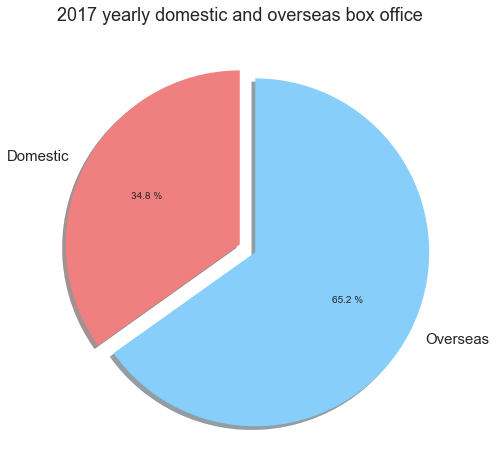

In [1368]:
labels = 'Domestic', 'Overseas'
fracs = [sum(boxoffice['Domestic']),sum(boxoffice['Overseas'])]
explode = [0, 0.1]
plt.axes(aspect=1)  
colors = ['lightcoral', 'lightskyblue']
plt.title('2017 yearly domestic and overseas box office')
plt.pie(x=fracs, labels=labels, explode=explode,autopct='%3.1f %%', colors=colors,
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.show()

We could see in 2017, for the top 200 movies, domestic part accounts for 34.8%, and overseas part accounts for 65.2%.

However, the proportion of the domestic box office changes in almost each film. We could see some different proportions in below pie charts.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5D058DE48>,
      dtype=object)

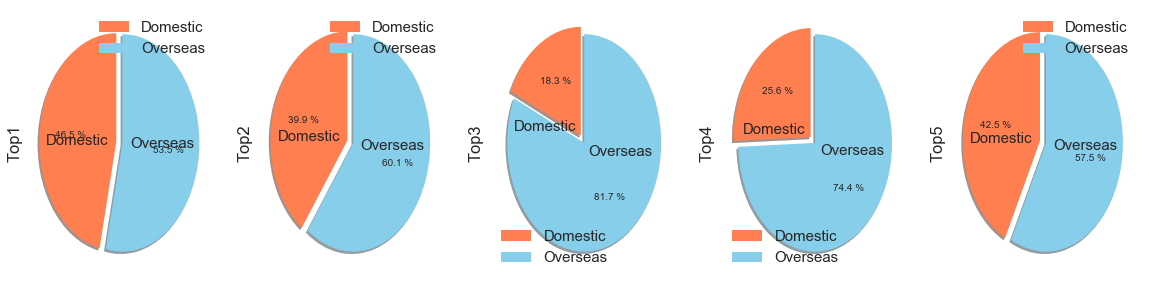

In [1369]:
Top1to5=boxoffice.loc[0:4,['Domestic','Overseas']]
Top1to5.index = ['Top1','Top2','Top3','Top4','Top5']
Top1to5.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['coral', 'skyblue'],
                explode = (0.08, 0),shadow=True, labeldistance=0.1, startangle = 90,pctdistance = 0.6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5D0BF1438>,
      dtype=object)

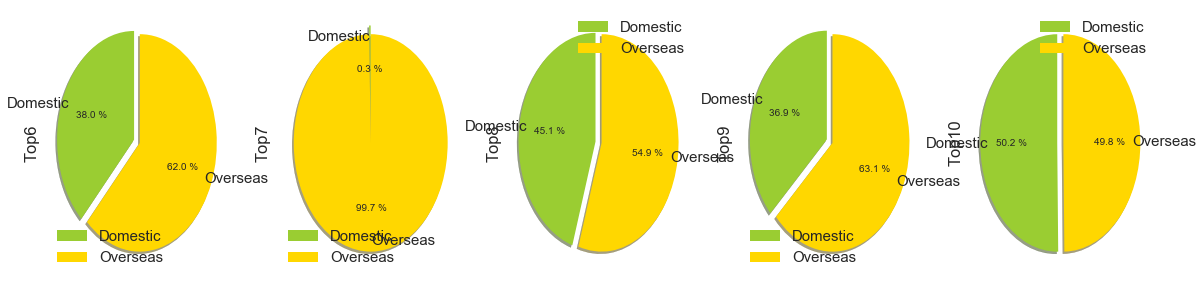

In [1370]:
Top6to10=boxoffice.loc[5:9,['Domestic','Overseas']]
Top6to10.index = ['Top6','Top7','Top8','Top9','Top10']
Top6to10.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['yellowgreen', 'gold'],
                explode = (0.08, 0),shadow=True, labeldistance=0.9, startangle = 90,pctdistance = 0.6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5D0FC9978>,
      dtype=object)

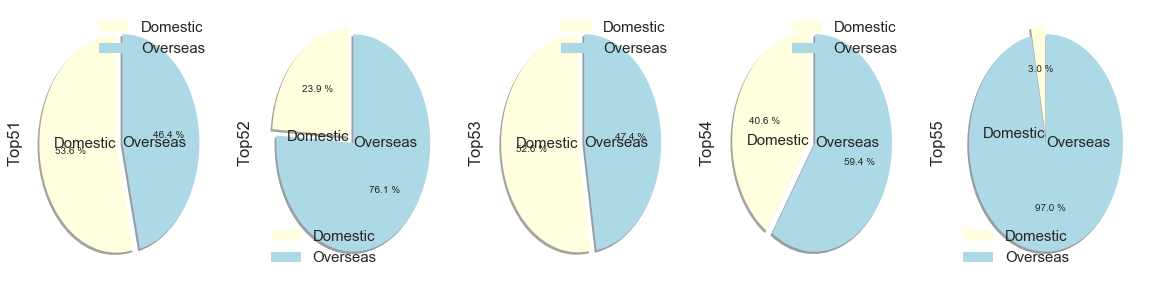

In [1371]:
Top51to55=boxoffice.loc[50:54,['Domestic','Overseas']]
Top51to55.index = ['Top51','Top52','Top53','Top54','Top55']
Top51to55.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['lightyellow', 'lightblue'],
                explode = (0.08, 0),shadow=True, labeldistance=0.001, startangle = 90,pctdistance = 0.6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5D19C37B8>,
      dtype=object)

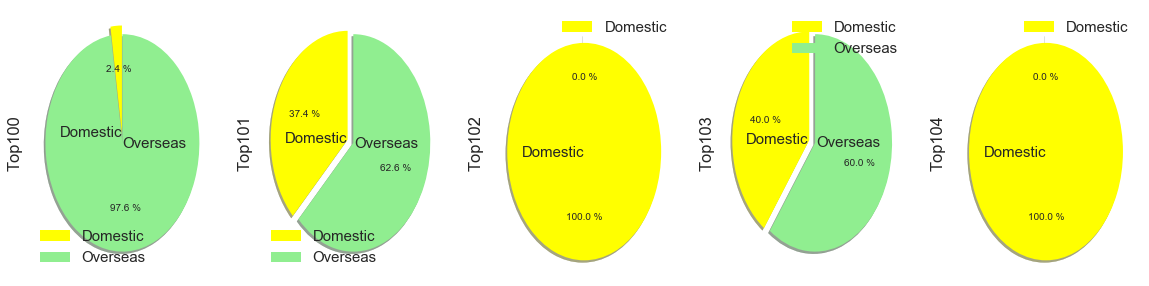

In [1372]:
Top100to104=boxoffice.loc[100:104,['Domestic','Overseas']]
Top100to104.index = ['Top100','Top101','Top102','Top103','Top104']
Top100to104.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['yellow', 'lightgreen'],
                explode = (0.08, 0),shadow=True, labeldistance=0.01, startangle = 90,pctdistance = 0.6)

__step 2.3 Has the Big Six still ruled the movie market in 2017? __

## Big Six
Worldwide film market has long been ruled by the ‘Big Six’. These ‘Big Six’ are: 20th Century Fox, Warner Bros., Paramount Pictures, Columbia Pictures, Universal Pictures & Walt Disney Pictures. 


<img class="irc_mi" src="https://www.nyfa.edu/student-resources/wp-content/uploads/2015/01/big-six1-1024x768.png" alt="Image result for Big Six movie studios" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" width="304" height="228" style="margin-top: 63px;">

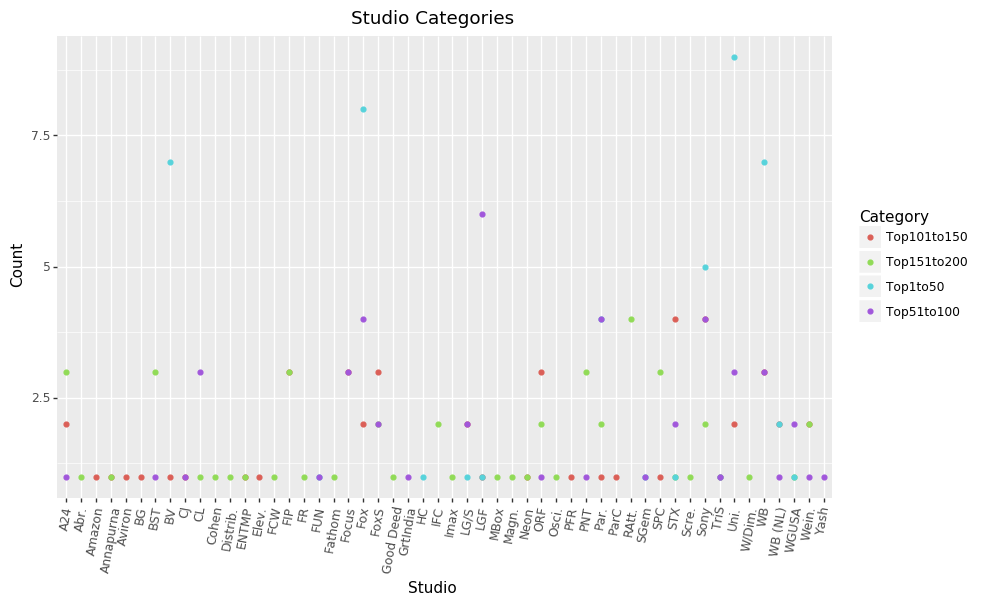

<ggplot: (-9223371850632330201)>

In [1373]:
(gg.ggplot(boxoffice, gg.aes(x = "Studio", color = "Category")) + 
 gg.geom_point(stat = "count")+
 gg.theme(figure_size=(10, 6),axis_text_x=gg.element_text(rotation=80))+ 
 gg.labs(title = "Studio Categories", x = "Studio", y = "Count")
)

We could see 5 film studios has over 5 top 50 films. 

In [1374]:
studio=boxoffice.drop(boxoffice.columns[[0,1]], axis=1, inplace=True)

In [1375]:
studio=boxoffice.groupby('Studio').sum()

In [1376]:
studio.sort_values(by='Worldwide',ascending=False).head(10)

,Worldwide,Domestic,Overseas
Studio,,,
BV,6266.5,2377.0,3889.3
Uni.,4760.0,1453.0,3307.0
WB,3767.7,1479.4,2288.5
Fox,3760.9,1338.2,2422.8
Sony,2905.6,1078.7,1844.9
Par.,1737.7,490.5,1247.3
WB (NL),1167.1,532.4,634.7
HC,870.3,2.7,867.6
LGF,796.5,421.5,375.2


In [1377]:
studio.sort_values(by='Domestic',ascending=False).head(10)

,Worldwide,Domestic,Overseas
Studio,,,
BV,6266.5,2377.0,3889.3
WB,3767.7,1479.4,2288.5
Uni.,4760.0,1453.0,3307.0
Fox,3760.9,1338.2,2422.8
Sony,2905.6,1078.7,1844.9
WB (NL),1167.1,532.4,634.7
Par.,1737.7,490.5,1247.3
LGF,796.5,421.5,375.2
LG/S,499.3,279.2,220.2


In [1378]:
studio.sort_values(by='Overseas',ascending=False).head(10)

,Worldwide,Domestic,Overseas
Studio,,,
BV,6266.5,2377.0,3889.3
Uni.,4760.0,1453.0,3307.0
Fox,3760.9,1338.2,2422.8
WB,3767.7,1479.4,2288.5
Sony,2905.6,1078.7,1844.9
Par.,1737.7,490.5,1247.3
HC,870.3,2.7,867.6
WB (NL),1167.1,532.4,634.7
WGUSA,440.0,9.2,435.9


In [1379]:
Big6=boxoffice[(boxoffice['Studio']=='BV')|(boxoffice['Studio']=='Fox')|
              (boxoffice['Studio']=='Sony')|(boxoffice['Studio']=='Par.')|
              (boxoffice['Studio']=='Uni.')|(boxoffice['Studio']=='WB')]

In [1384]:
sum(Big6['Worldwide'])/sum(boxoffice['Worldwide'])

0.7431454519244625

In [1382]:
sum(Big6['Domestic'])/sum(boxoffice['Domestic'])

0.7536343541626536

In [1383]:
sum(Big6['Overseas'])/sum(boxoffice['Overseas'])

0.735818142574024

Accumulate the box office for each film studio, we could see that except in the ranking of the domestict box office, the Par. was replaced by the  WB (NL), the Big Six film studios were still at the top 6 ranking of the highest box office. The accumulative grosses of the Big Six film studios accounted for more than 70% of worldwide, domestic and overseas box office. Even though the film indusry has been more competitive all over the world, the Big Six film studios not only ruled the Hollywood, but also the worldwide film industries.

And BV was the champion in the worldwide, the domestic and the overseas box office. Why BV is the champion of the accumulative grosses?

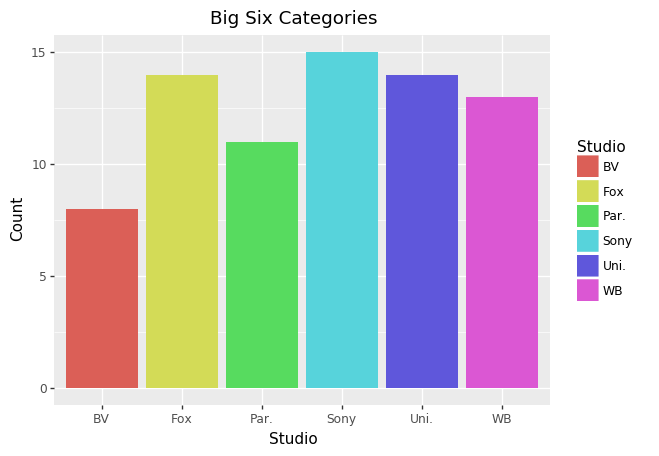

<ggplot: (-9223371850610392141)>

In [1380]:
(gg.ggplot(Big6, gg.aes(x = "Studio",fill="Studio")) +
 gg.geom_bar(stat = "count",position='stack')+
 gg.labs(title = "Big Six Categories", x = "Studio", y = "Count")
)

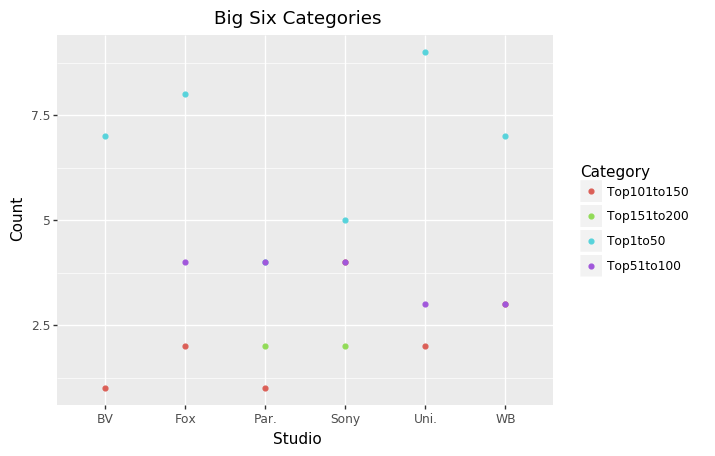

<ggplot: (-9223371850607331454)>

In [1381]:
(gg.ggplot(Big6, gg.aes(x = "Studio", color = "Category")) + 
 gg.geom_point(stat = "count")+
 gg.labs(title = "Big Six Categories", x = "Studio", y = "Count")
)

BV is the studio with highest cumulative grosses, but it distributed fewest movies among the top 200 movies. And it was Uni. produced most top 50 movies.

And it still couldn't explain Why BV is the champion of the accumulative grosses? 

Why BV is the champion of the accumulative grosses?

In [1401]:
boxoffice.head(10)[['Title','Studio']]

,Title,Studio
0,Star Wars: The Last Jedi,BV
1,Beauty and the Beast (2017),BV
2,The Fate of the Furious,Uni.
3,Despicable Me 3,Uni.
4,Jumanji: Welcome to the Jungle,Sony
5,Spider-Man: Homecoming,Sony
6,Wolf Warrior 2,HC
7,Guardians of the Galaxy Vol. 2,BV
8,Thor: Ragnarok,BV
9,Wonder Woman,WB


It is noticed that BV distributed, 'Star Wars: The Last Jedi' and 'Beauty and the Beast (2017)', the top 1 and top 2 movies ranking by the worldwide boxoffice. It also prodecued the top 8 and the top 9 movies. BV had distributed almost half of the top 10 movies at worldwide box office. That is the main reason that BV distributed fewest movies among the top 200 movies but won the top 1 accumulative box office.

__step 2.4 find domestic movies have higher box office in China instead of in the domestic(America).__

The definition of domestic movies(should fit all):
* made and produced mainly by domestic film studios.
 * It is not enough that the movie is merely produced by domestic movie studios, as many foreign movies introduced worldwide       choose  Hollywood movie studios.
 * Do not considerate jointly made and prodeced by one domestic movie studio and the other foreign movie studio. For example, we   do not include 'the Great Wall' and 'Kung Fu Panda3 (2016)'in the domestic movie list, but include 'Kung Fu Panda (2008)' and   Kung Fu Panda (2011)'.

How to find these movies. We follow these steps:
* 1.Select movies have higher overseas box office compared to the domestic box office. 
* 2.Select American movie studio.
* 3.Scrap Chinese box office of these left movies also from the Box Office Mojo. 
* 4.Select movies have higher Chinese box office compared to the domestic box office.
* 5.Select movies made by American movied manually.

In [1385]:
boxoffice=df[df['Year']==2017].reset_index(drop=True) 

In [1386]:
boxoffice['Dome_minus_Over']=(boxoffice['Overseas']-boxoffice['Domestic'])/boxoffice['Domestic']

In [1387]:
boxoffice=boxoffice[-boxoffice["Overseas"].isin(['n/a'])]
boxoffice=boxoffice[-boxoffice["Domestic"].isin(['n/a'])]

In [1388]:
boxoffice1=boxoffice[(boxoffice['Dome_minus_Over']>1)&(boxoffice['Dome_minus_Over']<60)]

In [1389]:
selected=set(boxoffice1['Studio'])
selected

{'Amazon',
 'BV',
 'CJ',
 'CL',
 'Distrib.',
 'Elev.',
 'FIP',
 'FR',
 'FUN',
 'Fox',
 'FoxS',
 'GrtIndia',
 'IFC',
 'Par.',
 'SGem',
 'STX',
 'Sony',
 'TriS',
 'Uni.',
 'WB',
 'WB (NL)',
 'WGUSA',
 'Wein.',
 'Yash'}

By checking one by one, exclude foreign movie studios. For instance, CJ is a Korean movie studio, and SGem is a German movie studio. We select domestic studios below.

In [1390]:
data=boxoffice1[(boxoffice1['Studio']=='Amazon')|(boxoffice1['Studio']=='BG')|
                (boxoffice1['Studio']=='BV')|(boxoffice1['Studio']=='Fox')|
                (boxoffice1['Studio']=='STX')|(boxoffice1['Studio']=='Wein.')|
                (boxoffice1['Studio']=='Sony')|(boxoffice1['Studio']=='Par.')|
                (boxoffice1['Studio']=='Uni.')|(boxoffice1['Studio']=='WB')|
                (boxoffice1['Studio']=='WB (NL)')]
data=data.reset_index(drop=True) 
data.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link,Dome_minus_Over
0,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,3.469027
1,2017,4,Despicable Me 3,Uni.,1034.8,264.6,770.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,1.910809
2,2017,11,Pirates of the Caribbean: Dead Men Tell No Tales,BV,794.9,172.6,622.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,2.605446
3,2017,12,Coco,BV,749.1,209.0,540.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,1.583732
4,2017,16,Transformers: The Last Knight,Par.,605.4,130.2,475.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,2.650538


In [1391]:
title=list(data['Title'])
title

['The Fate of the Furious',
 'Despicable Me 3',
 'Pirates of the Caribbean: Dead Men Tell No Tales',
 'Coco',
 'Transformers: The Last Knight',
 'Kong: Skull Island',
 'War for the Planet of the Apes',
 'Kingsman: The Golden Circle',
 'The Mummy (2017)',
 'Fifty Shades Darker',
 'Murder on the Orient Express (2017)',
 'xXx: The Return of Xander Cage',
 'The Great Wall',
 'Annabelle: Creation',
 'Ferdinand',
 'Journey to the West: The Demons Strike Back',
 'Alien: Covenant',
 'Valerian and the City of a Thousand Planets',
 'Geostorm',
 'Smurfs: The Lost Village',
 "A Dog's Purpose",
 'Baywatch',
 'Ghost in the Shell (2017)',
 'King Arthur: Legend of the Sword',
 'The Foreigner',
 'Leap!',
 'Life (2017)',
 'The Snowman',
 'A Cure for Wellness',
 'Wonder Wheel',
 'Tulip Fever',
 'Poster Boys']

In [1392]:
data['Link'][13]='http://www.boxofficemojo.com/movies/?page=intl&country=CH&id=residentevil6.htm'
Chinese=[]
for i in range(len(data)):
    url=data['Link'][i]
    html = urllib.request.urlopen(url)    
    bsObj = BeautifulSoup(html,'lxml-xml')
    list1=bsObj.findAll('b')
    x=list1[14].text
    Chinese.append(x)
data['Chinese']=Chinese

C:\Users\qxzhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [1393]:
data=data[-data['Chinese'].isin(['Australia','Austria','India','Colombia','Belgium'])]
data=data.reset_index(drop=True) 
data.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link,Dome_minus_Over,Chinese
0,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,3.469027,"$392,807,017"
1,2017,4,Despicable Me 3,Uni.,1034.8,264.6,770.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,1.910809,"$158,171,566"
2,2017,11,Pirates of the Caribbean: Dead Men Tell No Tales,BV,794.9,172.6,622.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,2.605446,"$172,277,290"
3,2017,12,Coco,BV,749.1,209.0,540.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,1.583732,"$189,226,296"
4,2017,16,Transformers: The Last Knight,Par.,605.4,130.2,475.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,2.650538,"$228,842,508"


In [1394]:
data['Chinese']=data['Chinese'].str.replace('$','')
data['Chinese']=data['Chinese'].str.replace(",","")

In [1395]:
data.Chinese =pd.to_numeric(data.Chinese, errors='coerce').fillna(0).astype(float)
data.Chinese=data.Chinese/1000000

In [1396]:
columns = ['Link', 'Dome_minus_Over']
data.drop(columns, inplace=True, axis=1)

In [1397]:
data=data[data['Chinese']>data['Domestic']]

In [1398]:
data=data.reset_index(drop=True)
data

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Chinese
0,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,392.807017
1,2017,16,Transformers: The Last Knight,Par.,605.4,130.2,475.3,Top1to50,228.842508
2,2017,17,Kong: Skull Island,WB,566.7,168.1,398.6,Top1to50,168.188002
3,2017,21,Kingsman: The Golden Circle,Fox,410.9,100.2,310.6,Top1to50,116.685716
4,2017,22,The Mummy (2017),Uni.,409.2,80.2,329.0,Top1to50,91.707392
5,2017,28,xXx: The Return of Xander Cage,Par.,346.1,44.9,301.2,Top1to50,164.066583
6,2017,29,The Great Wall,Uni.,334.9,45.5,289.4,Top1to50,170.962106
7,2017,32,Annabelle: Creation,WB (NL),306.5,102.1,204.4,Top1to50,159.548686
8,2017,39,Journey to the West: The Demons Strike Back,Sony,246.6,8.8,245.7,Top1to50,239.553888
9,2017,42,Valerian and the City of a Thousand Planets,STX,225.9,41.2,184.7,Top1to50,62.073823


Kingsman: The Golden Circle was an British movie, The Great Wall and Journey to the West: The Demons Strike Back were directed by Chinese director, Valerian and the City of a Thousand Planets was a French movie. The Foreigner was a jointly Chinese and British movie. So we choose movies below.

In [1399]:
movie=data.iloc[[0,1,2,4,5,10,11],:]
movie=movie.reset_index(drop=True) 
movie

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Chinese
0,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,392.807017
1,2017,16,Transformers: The Last Knight,Par.,605.4,130.2,475.3,Top1to50,228.842508
2,2017,17,Kong: Skull Island,WB,566.7,168.1,398.6,Top1to50,168.188002
3,2017,22,The Mummy (2017),Uni.,409.2,80.2,329.0,Top1to50,91.707392
4,2017,28,xXx: The Return of Xander Cage,Par.,346.1,44.9,301.2,Top1to50,164.066583
5,2017,43,Geostorm,WB,221.6,33.7,187.9,Top1to50,65.667015
6,2017,46,A Dog's Purpose,Uni.,196.4,64.5,131.9,Top1to50,88.226996


The following detailed analysis of these 7 movies is in the ' $Analysis of 7 movies with different domestic and Chinese box office.ipynb$'. Do you feel surprised of this phenomenon that domestic movies have higher Chinese box office instead of domestic box office. As what mentioned before, different movie taste resulted from culture could explain some part. Is it the only reason? 

You could find the answer in the next analysis.